# ~MegaMachine~

**Copyright@~MEGAMACHINE~**; 

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License. You may obtain a copy of the License at https://www.apache.org/licenses/LICENSE-2.0. Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

**Disclosure: Heart disease and failure prediction using Test results and Clinical records during these lectures is only taken as the general example to show, how one can do data analysis using pandas (in python). Data in these records is idealized to meet the machine model requirements. In real-life scenarios, these predictions may not be applicable. Please consider the specialist / doctors before application to the real-life scenarios of this type of dataset.  I would be not responsible for any kind of harm/loss to you.**

In [1]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn; 
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation); 
#                  https://docs.python.org/3.7/ (Recommended version – 3.7). 
# The Python Tutorial (python3.7): https://docs.python.org/3.7/tutorial/index.html 

# Load Module ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns 
from scipy.stats import norm 
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific 
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived 
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, 
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, 
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/ 
#     Docs: https://pandas.pydata.org/docs/ 
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html 
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide 

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a 
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

# scipy : SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. 
#         It adds significant power to the interactive Python session by providing the user with high-level commands and classes 
#         for manipulating and visualizing data. 
#   About: https://docs.scipy.org/doc/scipy/index.html 
#   scipy.stats.norm: A normal continuous random variable -> scipy.stats.norm(x,loc=0,scale=0)
#                   : The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

Python 3.7.11
numpy version: 1.19.5
pandas version:  1.1.5
seaborn version: 0.11.1
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>


# About Dataset – Heart Disease Data Set

**Abstract**: 4 databases – Cleveland, Hungary, Switzerland, and the VA Long Beach. This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. 

Dataset source ([ics.uci](https://archive.ics.uci.edu/ml/index.php)): https://archive.ics.uci.edu/ml/datasets/Heart+Disease (full dataset)  
Dataset download links ([dataset description](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names), [processed.cleveland.data](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data), [processed.hungarian.data](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data), [processed.switzerland.data](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data), [processed.va.data](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data)), drive link: [direct_drive_link](https://drive.google.com/drive/folders/1en92Q6Myn71y-R1zWSonU-D55X7l66QM?usp=sharing) (full dataset) 

This file is avilable at: https://drive.google.com/drive/folders/1wz7LPyb44dKfnPG6iC6NuPScr03daOEv?usp=sharing

**NOTE: Data is available under education license only. Don’t use dataset other than educational purposes.**

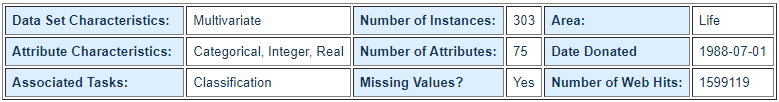

**More About Data** - 

A new discriminant function model for estimating probabilities of angiographic coronary disease was tested for reliability and clinical utility in 3 patient test groups. This model, derived from the clinical and noninvasive test results of 303 patients undergoing angiography at the Cleveland Clinic in Cleveland, Ohio, was applied to a group of 425 patients undergoing angiography at the Hungarian Institute of Cardiology in Budapest, Hungary (disease prevalence 38%); 200 patients undergoing angiography at the Veterans Administration Medical Center in Long Beach, California (disease prevalence 75%); and 143 such patients from the University Hospitals in Zurich and Basel, Switzerland (disease prevalence 84%). The probabilities that resulted from the application of the Cleveland algorithm were compared with those derived by applying a Bayesian algorithm derived from published medical studies called CADENZA to the same 3 patient test groups. Both algorithms overpredicted the probability of disease at the Hungarian and American centers. Overprediction was more pronounced with the use of CADENZA (average overestimation 16 vs 10% and 11 vs 5%, p less than 0.001). In the Swiss group, the discriminant function underestimated (by 7%) and CADENZA slightly overestimated (by 2%) disease probability. Clinical utility, assessed as the percentage of patients correctly classified, was modestly superior for the new discriminant function as compared with CADENZA in the Hungarian group and similar in the American and Swiss groups. It was concluded that coronary disease probabilities derived from discriminant functions are reliable and clinically useful when applied to patients with chest pain syndromes and intermediate disease prevalence. 

[Source - Abstract of International Application of a New Probability Algorithm for the Diagnosis of Coronary Artery Disease](https://pubmed.ncbi.nlm.nih.gov/2756873/)

## downlaoding data 

In [2]:
# cleveland data link - https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data 
!wget -qq https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data 
# hungarian data lisk - https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data 
!wget -qq https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data
# switzerland data link - https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data 
!wget -qq https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data
# VA Long Beach Healthcare System data link - https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data 
!wget -qq https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data  

## read data 

In [3]:
# data headings -- age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num
columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

# clevaland - 
df_clevaland=pd.read_csv('/content/processed.cleveland.data',header=None,names=columns)
df_clevaland.NAME_='clevaland'
# hungarian 
df_hungarian=pd.read_csv('/content/processed.hungarian.data',header=None,names=columns)
df_hungarian.NAME_='hungarian'
# switzerland 
df_switzerland=pd.read_csv('/content/processed.switzerland.data',header=None,names=columns)
df_switzerland.NAME_='switzerland'
# va 
df_va=pd.read_csv('/content/processed.va.data',header=None,names=columns)
df_va.NAME_='va'

# see shape of all dataframes 
['Name:{} - Row: {}, columns:{}'.format(df_.NAME_,*df_.shape) for df_ in [df_clevaland,df_hungarian,df_switzerland,df_va]]

['Name:clevaland - Row: 303, columns:14',
 'Name:hungarian - Row: 294, columns:14',
 'Name:switzerland - Row: 123, columns:14',
 'Name:va - Row: 200, columns:14']

#### [multiindex-advanced-indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#multiindex-advanced-indexing)

In [4]:
# add all data to one single dataframe 
# make base - with clevaland data 
df_hd_ALL=pd.DataFrame(df_clevaland.values,
                       columns=columns,index=pd.MultiIndex.from_arrays([len(df_clevaland.index)*[df_clevaland.NAME_],df_clevaland.index]))

# add remaining dataframes 
for df_ in [df_hungarian,df_switzerland,df_va]:
  df_hd_ALL=df_hd_ALL.append(pd.DataFrame(df_.values,columns=columns,index=pd.MultiIndex.from_arrays([len(df_.index)*[df_.NAME_],
                                                                                                      range(df_hd_ALL.index[-1][1]+1,df_hd_ALL.index[-1][1]+1+len(df_.index))])))
  
# see head 
df_hd_ALL.head()

age sex cp trestbps chol fbs  ... exang oldpeak slope   ca thal num
clevaland 0  63   1  1      145  233   1  ...     0     2.3     3  0.0  6.0   0
          1  67   1  4      160  286   0  ...     1     1.5     2  3.0  3.0   2
          2  67   1  4      120  229   0  ...     1     2.6     2  2.0  7.0   1
          3  37   1  3      130  250   0  ...     0     3.5     3  0.0  3.0   0
          4  41   0  2      130  204   0  ...     0     1.4     1  0.0  3.0   0

[5 rows x 14 columns]

In [5]:
df_hd_ALL.tail()

age sex cp trestbps chol fbs  ... exang oldpeak slope ca thal num
va 915  54   0  4      127  333   1  ...     0       0     ?  ?    ?   1
   916  62   1  1        ?  139   0  ...     ?       ?     ?  ?    ?   0
   917  55   1  4      122  223   1  ...     0       0     ?  ?    6   2
   918  58   1  4        ?  385   1  ...     ?       ?     ?  ?    ?   0
   919  62   1  2      120  254   0  ...     1       0     ?  ?    ?   1

[5 rows x 14 columns]

## [pandas.IndexSlice](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.IndexSlice.html)

help: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.IndexSlice.html

In [6]:
idx_loc=pd.IndexSlice

## data stats 

In [7]:
# info 
df_hd_ALL.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 920 entries, ('clevaland', 0) to ('va', 919)
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       920 non-null    object
 1   sex       920 non-null    object
 2   cp        920 non-null    object
 3   trestbps  920 non-null    object
 4   chol      920 non-null    object
 5   fbs       920 non-null    object
 6   restecg   920 non-null    object
 7   thalach   920 non-null    object
 8   exang     920 non-null    object
 9   oldpeak   920 non-null    object
 10  slope     920 non-null    object
 11  ca        920 non-null    object
 12  thal      920 non-null    object
 13  num       920 non-null    object
dtypes: object(14)
memory usage: 150.7+ KB


In [8]:
# numpy.nan 
df_hd_ALL.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
# as null values are mark by - '?'
list(df_hd_ALL.where(df_hd_ALL=='?').fillna(0).values.reshape(-1)).count('?') # total null values 

1759

In [10]:
# column wise count 
for column_ in df_hd_ALL.columns:
  print(f'In {column_}:',list(df_hd_ALL[column_].values.reshape(-1)).count('?'))

In age: 0
In sex: 0
In cp: 0
In trestbps: 59
In chol: 30
In fbs: 90
In restecg: 2
In thalach: 55
In exang: 55
In oldpeak: 62
In slope: 309
In ca: 611
In thal: 486
In num: 0


## change data-types of columns 

In [11]:
# replace '?' with 'NaN'
df_hd_ALL.replace(to_replace='?',value='NaN',inplace=True)
# re-check 4 '?'
list(df_hd_ALL.where(df_hd_ALL=='?').fillna(0).values.reshape(-1)).count('?')

0

In [12]:
# make all columns as float
df_hd_ALL=df_hd_ALL.astype(np.float64,copy=False,errors='raise')
# check datatype
df_hd_ALL.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num         float64
dtype: object

In [13]:
# count for null (NaN)
df_hd_ALL.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [14]:
# null percentage count 
np.round((1-df_hd_ALL.count()/df_hd_ALL.shape[0])*100,2)

age          0.00
sex          0.00
cp           0.00
trestbps     6.41
chol         3.26
fbs          9.78
restecg      0.22
thalach      5.98
exang        5.98
oldpeak      6.74
slope       33.59
ca          66.41
thal        52.83
num          0.00
dtype: float64

## [Feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

Source: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html

In [15]:
# drop all rows having any null values and get data ---
X,y=df_hd_ALL.dropna(axis=0,how='any').values[:,:-1],df_hd_ALL.dropna(axis=0,how='any').values[:,-1]
'Data shape:',X.shape,y.shape,'Original shape:',df_hd_ALL.shape,'Percentage:',X.shape[0]/df_hd_ALL.shape[0]

('Data shape:',
 (299, 13),
 (299,),
 'Original shape:',
 (920, 14),
 'Percentage:',
 0.325)

In [16]:
# F score and Mutual Information of features 
from sklearn.feature_selection import f_classif,mutual_info_classif
# source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html
# source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html

# get f-score - linear dependency
f_score,p_value=f_classif(X,y)
# normalize f-score 
f_score/=max(f_score)

# get mutual information - dependency as - xi is discriminative feature or not 
mutual_dependence=mutual_info_classif(X,y)
# normalize
mutual_dependence/=max(mutual_dependence)

In [50]:
f_new_score,p_new_value=f_classif(X_data,y_labels)
# normalize f-score 
f_new_score/=max(f_new_score)

# get mutual information - dependency as - xi is discriminative feature or not 
mutual_dependence_new=mutual_info_classif(X_data,y_labels)
# normalize
mutual_dependence_new/=max(mutual_dependence_new)

In [54]:
# over all results 
result_fs_new_=pd.DataFrame(final_hd_df.drop(columns=['num']).columns,columns=['feature'])
# add results
result_fs_new_['f_score']=f_new_score
result_fs_new_['mutual_dependence']=mutual_dependence_new
result_fs_new_['over_all']=f_new_score*mutual_dependence_new

result_fs_new_

,feature,f_score,mutual_dependence,over_all
0,cp,0.888787,0.796665,0.708065
1,thalach,0.588444,0.200925,0.118233
2,oldpeak,0.769288,0.563027,0.433130
3,thal,0.937059,1.000000,0.937059
4,ca,1.000000,0.991101,0.991101


In [17]:
# over all results 
result_fs_=pd.DataFrame(df_hd_ALL.columns[:-1],columns=['feature'])
# add results
result_fs_['f_score']=f_score
result_fs_['mutual_dependence']=mutual_dependence
result_fs_['over_all']=f_score*mutual_dependence

# see results 
result_fs_

,feature,f_score,mutual_dependence,over_all
0,age,0.153756,0.259716,0.039933
1,sex,0.202552,0.000000,0.000000
2,cp,0.539506,0.811183,0.437638
3,trestbps,0.065097,0.106746,0.006949
4,chol,0.026405,0.155211,0.004098
5,fbs,0.065857,0.000000,0.000000
6,restecg,0.101837,0.000000,0.000000
7,thalach,0.617980,0.564710,0.348980
8,exang,0.570657,0.373631,0.213215
9,oldpeak,0.805789,1.000000,0.805789


## statistical analysis - !s data statically same? [EDA ](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

In [18]:
# data is of -- 
sub_dataframe_name=list({index[0] for index in df_hd_ALL.index})
sub_dataframe_name

['va', 'hungarian', 'switzerland', 'clevaland']

In [19]:
# most important features -- 
result_fs_.sort_values('over_all',axis=0,ascending=False).feature.values

array(['thal', 'oldpeak', 'ca', 'cp', 'thalach', 'slope', 'exang', 'age',
       'trestbps', 'chol', 'sex', 'fbs', 'restecg'], dtype=object)

In [20]:
# value count for top three features (see we have enough value for EDA or not) -- 
for column_ in result_fs_.sort_values('over_all',axis=0,ascending=False).feature.values[:3]:
  # for each area 
  for place_ in sub_dataframe_name: 
    print(f'For column "{column_}" of area "{place_}" total values -',df_hd_ALL.loc[idx_loc[place_,:],column_].dropna(how='any').shape)
  print()

For column "thal" of area "va" total values - (34,)
For column "thal" of area "hungarian" total values - (28,)
For column "thal" of area "switzerland" total values - (71,)
For column "thal" of area "clevaland" total values - (301,)

For column "oldpeak" of area "va" total values - (144,)
For column "oldpeak" of area "hungarian" total values - (294,)
For column "oldpeak" of area "switzerland" total values - (117,)
For column "oldpeak" of area "clevaland" total values - (303,)

For column "ca" of area "va" total values - (2,)
For column "ca" of area "hungarian" total values - (3,)
For column "ca" of area "switzerland" total values - (5,)
For column "ca" of area "clevaland" total values - (299,)



In [21]:
# taking into account top two features to see - data is statically same or not?
# selected features - "thal" and "oldpeak"

### graphical way - [box and whisker plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) 

Make a box and whisker plot for each column of x or each vector in sequence x. The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. Flier points are those past the end of the whiskers.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


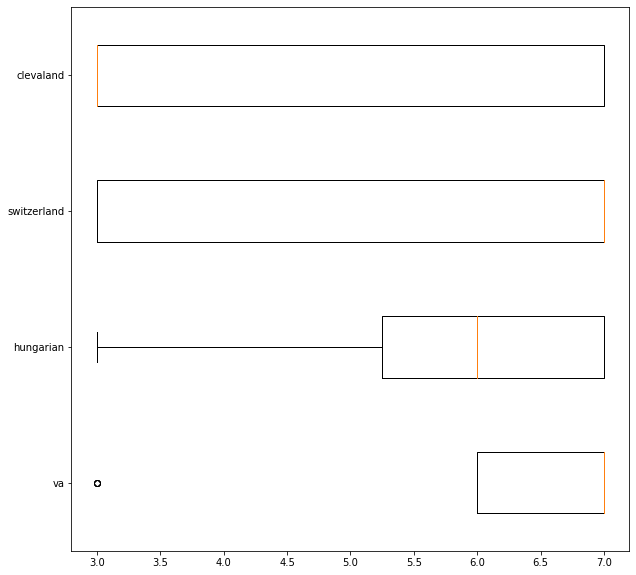

In [22]:
# plot for "thal"
plt.figure(figsize=(10,10))
plt.boxplot([df_hd_ALL.loc[idx_loc[place_,:],'thal'].dropna(how='any').values for place_ in sub_dataframe_name],
            vert=False,patch_artist=False,labels=sub_dataframe_name)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


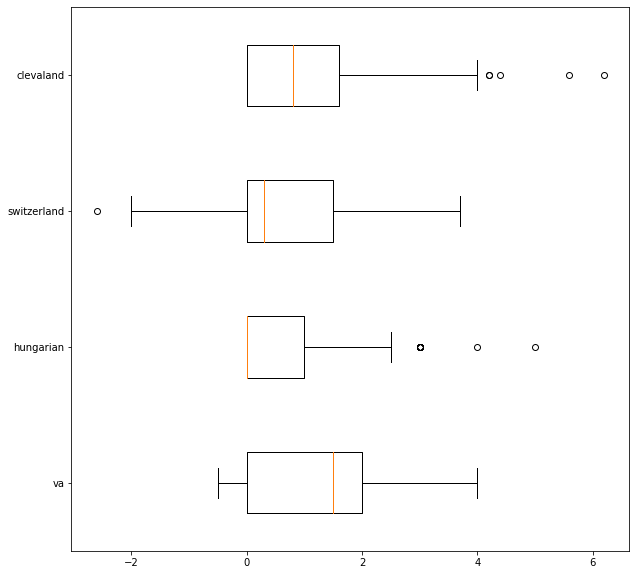

In [23]:
# plot for "oldpeak"
plt.figure(figsize=(10,10))
plt.boxplot([df_hd_ALL.loc[idx_loc[place_,:],'oldpeak'].dropna(how='any').values for place_ in sub_dataframe_name],
            vert=False,patch_artist=False,labels=sub_dataframe_name)
plt.show()

### numerical way - [Analysis of variance (ANOVA)](https://en.wikipedia.org/wiki/Analysis_of_variance)

In [24]:
# install statsmodels 
!python -m pip install -q --upgrade statsmodels

     |████████████████████████████████| 9.5 MB 12.7 MB/s 


In [25]:
from sklearn.feature_selection import f_oneway
# 
from statsmodels.stats.oneway import anova_oneway
# source: https://www.statsmodels.org/stable/generated/statsmodels.stats.oneway.anova_oneway.html

In [26]:
# check for "thal"

# get values for thal 
#data_dict_thal=dict(zip(sub_dataframe_name,
#                        [df_hd_ALL.loc[idx_loc[place_,:],'thal'].dropna(how='any').values for place_ in sub_dataframe_name]))

# get minimum length "thal" array - (for sample size)
#sample_size=min([len(value) for key,value in data_dict_thal.items()])

# get f-score and p-value for all values 
all_f_score,all_p_value=f_oneway(*[df_hd_ALL.loc[idx_loc[place_,:],'thal'].dropna(how='any').values for place_ in sub_dataframe_name])

# get f-score and p-value for randomly selected sample size 
#f_score,p_value=f_oneway(*[np.random.choice(df_hd_ALL.loc[idx_loc[place_,:],'thal'].dropna(how='any').values,size=sample_size,replace=False) for place_ in sub_dataframe_name])

#print(f'f-score: all- {all_f_score}, sampled- {f_score}')
#print(f'p-value: all- {all_p_value}, sampled- {p_value}')

all_f_score,all_p_value

(array([12.7875949]), array([5.09872038e-08]))

In [27]:
anova_oneway([df_hd_ALL.loc[idx_loc[place_,:],'thal'].dropna(how='any').values for place_ in sub_dataframe_name],use_var='unequal')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 17.032574145367157
pvalue = 1.2803758446684824e-08
df = (3.0, 78.78478325095585)
df_num = 3.0
df_denom = 78.78478325095585
nobs_t = 434.0
n_groups = 4
means = [6.29411765 5.64285714 5.78873239 4.73421927]
nobs = [ 34.  28.  71. 301.]
vars_ = [1.6684492  2.60846561 2.99758551 3.76245847]
use_var = unequal
welch_correction = True
tuple = (17.032574145367157, 1.2803758446684824e-08)

In [28]:
# check for "oldpeak"

# get values for oldpeak 
#data_dict_oldpeak=dict(zip(sub_dataframe_name,
#                        [df_hd_ALL.loc[idx_loc[place_,:],'oldpeak'].dropna(how='any').values for place_ in sub_dataframe_name]))

# get minimum length "oldpeak" array - (for sample size)
#sample_size=min([len(value) for key,value in data_dict_oldpeak.items()])

# get f-score and p-value for all values 
all_f_score,all_p_value=f_oneway(*[df_hd_ALL.loc[idx_loc[place_,:],'oldpeak'].dropna(how='any').values for place_ in sub_dataframe_name])

# get f-score and p-value for randomly selected sample size 
#f_score,p_value=f_oneway(*[np.random.choice(df_hd_ALL.loc[idx_loc[place_,:],'oldpeak'].dropna(how='any').values,size=sample_size,replace=False) for place_ in sub_dataframe_name])

#print(f'f-score: all- {all_f_score}, sampled- {f_score}')
#print(f'p-value: all- {all_p_value}, sampled- {p_value}')

all_f_score,all_p_value

(array([20.03107528]), array([1.49134389e-12]))

In [29]:
anova_oneway([df_hd_ALL.loc[idx_loc[place_,:],'oldpeak'].dropna(how='any').values for place_ in sub_dataframe_name],use_var='unequal')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 20.809830387698284
pvalue = 2.01382486299753e-12
df = (3.0, 347.5411413883863)
df_num = 3.0
df_denom = 347.5411413883863
nobs_t = 858.0
n_groups = 4
means = [1.32083333 0.58605442 0.65384615 1.03960396]
nobs = [144. 294. 117. 303.]
vars_ = [1.22375874 0.82564103 1.11526525 1.34809521]
use_var = unequal
welch_correction = True
tuple = (20.809830387698284, 2.01382486299753e-12)

## manage [nulls (filling nulls)](https://scikit-learn.org/stable/modules/impute.html) and feature space (**Neglecting  Anova** due to high mising data of 'switzerland', 'hungarian', and 'va')

In [30]:
# drop all less important features (f-score*mutual_dependence, i.e. over_all score < 0.30)
df_hd_ALL_filtered=df_hd_ALL.drop(columns=result_fs_[result_fs_.over_all<0.30].feature.values,inplace=False)
# see shape 
'filtered data',df_hd_ALL_filtered.shape,'original data',df_hd_ALL.shape

('filtered data', (920, 6), 'original data', (920, 14))

In [31]:
# count for null in filtered data 
df_hd_ALL_filtered.isna().sum()

cp           0
thalach     55
oldpeak     62
ca         611
thal       486
num          0
dtype: int64

In [32]:
# null percentage count in filtered data 
np.round((1-df_hd_ALL_filtered.count()/df_hd_ALL_filtered.shape[0])*100,2)

cp          0.00
thalach     5.98
oldpeak     6.74
ca         66.41
thal       52.83
num         0.00
dtype: float64

In [33]:
# "ca" and "thal" are at critical risk - both are categorical-numerical
df_hd_ALL_filtered.ca.unique(),df_hd_ALL_filtered.thal.unique()

(array([ 0.,  3.,  2.,  1., nan]), array([ 6.,  3.,  7., nan]))

In [34]:
# filling missing value for "ca" and "thal"
from sklearn.impute import KNNImputer 
# source: https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation
# doc: https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

In [35]:
# make model for ca
ca_filler_=KNNImputer(missing_values=np.nan,n_neighbors=5)

# get data 
ca_data_4_filling_=df_hd_ALL_filtered.loc[df_hd_ALL_filtered.drop(columns=['ca','thal']).dropna(how='any').index].drop(columns=['thal'])

print('before filling:\n',ca_data_4_filling_.isna().sum(),sep='')
print('\nBefore filling unique values:',df_hd_ALL_filtered.ca.unique(),'\n')

# filling values 
hd_ALL_ca_filled=ca_filler_.fit_transform(ca_data_4_filling_.values)
# see change 
print('After filling:',np.sum(hd_ALL_ca_filled==np.nan,axis=0),sep='')
print('After filling unique values:',sorted(set(hd_ALL_ca_filled[:,-2])))

before filling:
cp           0
thalach      0
oldpeak      0
ca         548
num          0
dtype: int64

Before filling unique values: [ 0.  3.  2.  1. nan] 

After filling:[0 0 0 0 0]
After filling unique values: [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 3.0]


In [36]:
# make model for thal
thal_filler_=KNNImputer(missing_values=np.nan,n_neighbors=5)

# get data 
thal_data_4_filling_=df_hd_ALL_filtered.loc[df_hd_ALL_filtered.drop(columns=['ca','thal']).dropna(how='any').index].drop(columns=['ca'])

print('before filling:\n',thal_data_4_filling_.isna().sum(),sep='')
print('\nBefore filling unique values:',df_hd_ALL_filtered.thal.unique(),'\n')

# filling values 
hd_ALL_thal_filled=thal_filler_.fit_transform(thal_data_4_filling_.values)
# see change 
print('After filling:',np.sum(hd_ALL_thal_filled==np.nan,axis=0),sep='')
print('After filling unique values:',sorted(set(hd_ALL_thal_filled[:,-2])))

before filling:
cp           0
thalach      0
oldpeak      0
thal       430
num          0
dtype: int64

Before filling unique values: [ 6.  3.  7. nan] 

After filling:[0 0 0 0 0]
After filling unique values: [3.0, 3.6, 3.8, 4.2, 4.4, 4.6, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0]


In [37]:
# place values in data-frame 

# make final data-frame
final_hd_df=thal_data_4_filling_.copy()
# fill "ca"
final_hd_df['ca']=hd_ALL_ca_filled[:,-2]
# fill "thal"
final_hd_df['thal']=hd_ALL_thal_filled[:,-2]

# final check
final_hd_df.isna().sum()

cp         0
thalach    0
oldpeak    0
thal       0
num        0
ca         0
dtype: int64

In [38]:
# shape change 
'original shape:',df_hd_ALL.shape,'final shape',final_hd_df.shape,'change (row)',final_hd_df.shape[0]/df_hd_ALL.shape[0]

('original shape:',
 (920, 14),
 'final shape',
 (857, 6),
 'change (row)',
 0.9315217391304348)

## make final model - train and test Benchmark classifiers - (**Neglecting Anova** - Simple Case Study)

In [39]:
# split data 

# data 
X_data=final_hd_df.drop(columns=['num']).values
# labels 
y_labels=final_hd_df.num.values

print('Class labels:',set(y_labels))

from sklearn.model_selection import train_test_split
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# split data
Xtrain,Xtest,ytrain,ytest=train_test_split(X_data,y_labels,test_size=0.1)

# see shape 
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

Class labels: {0.0, 1.0, 2.0, 3.0, 4.0}


((771, 5), (86, 5), (771,), (86,))

In [47]:
# train and test Benchmark classifiers

# source: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
# source: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC
# source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
# source: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
from sklearn.naive_bayes import GaussianNB

# make models 
models=[(KNeighborsClassifier(n_neighbors=5,algorithm='auto',metric='minkowski'),'KNeighbors'),
        (DecisionTreeClassifier(criterion='gini'),'Decision Tree'),
        (SVC(C=1.0,kernel='rbf'),'Support Vector Machine'),
        (GaussianNB(priors=None),'Gaussian Naive Bayes')]

# fit / train model 
%time [model_[0].fit(Xtrain,ytrain) for model_ in models]

CPU times: user 31.8 ms, sys: 0 ns, total: 31.8 ms
Wall time: 31.8 ms


[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 GaussianNB(priors=None, var_smoothing=1e-09)]

In [48]:
# get model scores on test sets 
%time score_card={model_[1]:round(model_[0].score(Xtest,ytest)*100,3) for model_ in models}
print(score_card)

CPU times: user 11.3 ms, sys: 842 µs, total: 12.2 ms
Wall time: 15.3 ms
{'KNeighbors': 52.326, 'Decision Tree': 54.651, 'Support Vector Machine': 44.186, 'Gaussian Naive Bayes': 58.14}


In [42]:
from sklearn.model_selection import cross_val_score
# source: https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics
# doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

# number of cross validations
n_cvs=10

# make models 4 cross validation 
models=[(KNeighborsClassifier(n_neighbors=10,algorithm='auto',metric='minkowski'),'KNeighbors'),
        (DecisionTreeClassifier(criterion='gini'),'Decision Tree'),
        (SVC(C=1.0,kernel='rbf'),'Support Vector Machine'),
        (GaussianNB(priors=None),'Gaussian Naive Bayes')]

# fit / train model 
%time scores=[cross_val_score(model_,X_data,y_labels,cv=n_cvs) for model_,model_name in models]

for model_,score_ in zip(models,scores):
  print(f'For model - {model_[1]} maximum sore: {round(max(score_),3)}; minimum: {round(min(score_),3)}; avg.: {round(sum(score_)/len(score_),3)}')

CPU times: user 410 ms, sys: 0 ns, total: 410 ms
Wall time: 413 ms
For model - KNeighbors maximum sore: 0.698; minimum: 0.353; avg.: 0.541
For model - Decision Tree maximum sore: 0.616; minimum: 0.376; avg.: 0.527
For model - Support Vector Machine maximum sore: 0.547; minimum: 0.424; avg.: 0.494
For model - Gaussian Naive Bayes maximum sore: 0.686; minimum: 0.365; avg.: 0.58


## Now what ?

* Look for better [Decision Tree](https://scikit-learn.org/stable/modules/tree.html) Classifier - like -> [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html),  [Gradient Tree Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting)
or [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* Or go for model selection - [Lasso model selection: Cross-Validation / Akaike information criterion (AIC) / Bayes Information criterion (BIC)](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html) 
* Did you normalize data? 